# MOOD COMPARISION GENERAL MOVIES VS STAR TREK GUEST STAR MOVIES

Sentiments Analysis is done based on the movies descriptions. 
500 random General Movies vs 500 randomly selected movies that star trek guest actors appeared. 

In [40]:
# Import Needy Files

import json
import sample_data as MOV
import star_trek_tos_data as TOS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import scipy
import plotly.plotly as py
import seaborn as sns

import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Load General Movie Names and Movie Description

description_mov = []
title_mov = []

for movie_id in MOV.sample_movies:
    movie_dat = MOV.sample_movies[movie_id]
    
    # print(json.dumps(movie_dat['adult'], indent = 4, sort_keys = True))
    
    try:
        description_mov.append(movie_dat['overview'])
        title_mov.append(movie_dat['original_title'])
        # guest_name.append(movie_dat['guest_names'])
    
    except KeyError:
        print('Error')

In [3]:
df_mov = pd.DataFrame({'Movie Title': title_mov,
                  'Description': description_mov,
                  })

In [4]:
sentiments_mov = {}

compound = []
positive = []
negative = []
neutral = []
    
for text in df_mov['Description']:
    
    results = analyzer.polarity_scores(text)
    com = results["compound"]
    pos = results["pos"]
    neg = results["neg"]
    neu = results["neu"]
            
    compound.append(com)
    positive.append(pos)
    negative.append(neg)
    neutral.append(neu)
    
sentiments_mov=(compound, positive, negative, neutral)

In [5]:
the_data_mov = {'Compound': sentiments_mov[0],
           'Positive': sentiments_mov[1],
           'Negative': sentiments_mov[2],
           'Neutral': sentiments_mov[3],
            'Movie Title': title_mov,
               }

In [6]:
senti_data_mov = pd.DataFrame(the_data_mov)
senti_data_mov.index = range(1,501)
senti_data_mov.head()

,Compound,Movie Title,Negative,Neutral,Positive
1,-0.6486,대한민국 1%,0.135,0.777,0.088
2,-0.1280,Zucchero - Zu and co. - Live at the Royal Albe...,0.045,0.955,0.000
3,-0.7630,Hidden Agenda,0.204,0.665,0.131
4,0.9497,Sade Live,0.000,0.823,0.177
5,0.0000,Moonrunners,0.000,1.000,0.000


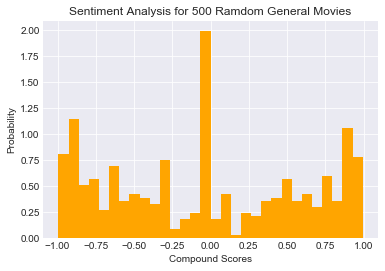

In [43]:
plt.hist(senti_data_mov['Compound'], normed=True, bins=30, color = 'orange')
plt.ylabel('Probability')
plt.title('Sentiment Analysis for 500 Ramdom General Movies')
plt.xlabel('Compound Scores')
plt.style.use('seaborn-darkgrid')
plt.savefig('senti_data_mov', bbox_inches="tight")
plt.show()

In [8]:
# Load Star Trek Movie Names and Moive Description

description_tos = []
title_tos = []

for movie_id in TOS.guest_movies:
    movie_dat = TOS.guest_movies[movie_id]
    
    # print(json.dumps(movie_dat['adult'], indent = 4, sort_keys = True))
    
    try:
        description_tos.append(movie_dat['overview'])
        title_tos.append(movie_dat['original_title'])
        # guest_name.append(movie_dat['guest_names'])
    
    except KeyError:
        print('Error')

Error


In [9]:
df_tos = pd.DataFrame({'Movie Title': title_tos,
                  'Description': description_tos,
                  })

In [10]:
# Select Random 500 samples from df_TOS data frame

df_tos = df_tos.sample(500)

In [11]:
sentiments_tos = {}

compound = []
positive = []
negative = []
neutral = []
    
for text in df_tos['Description']:
    
    results = analyzer.polarity_scores(text)
    com = results["compound"]
    pos = results["pos"]
    neg = results["neg"]
    neu = results["neu"]
            
    compound.append(com)
    positive.append(pos)
    negative.append(neg)
    neutral.append(neu)
    
sentiments_tos=(compound, positive, negative, neutral)

In [12]:
the_data_tos = {'Compound': sentiments_tos[0],
           'Positive': sentiments_tos[1],
           'Negative': sentiments_tos[2],
           'Neutral': sentiments_tos[3],
            'Movie Title': df_tos['Movie Title'],
               }

In [13]:
senti_data_tos = pd.DataFrame(the_data_tos)
senti_data_tos.index = range(1,501)
senti_data_tos.head()

,Compound,Movie Title,Negative,Neutral,Positive
1,-0.4215,The Snows of Kilimanjaro,0.113,0.887,0.000
2,-0.5267,The Helicopter Spies,0.268,0.732,0.000
3,-0.6902,Don't You Believe It,0.110,0.890,0.000
4,-0.0387,Halls of Anger,0.114,0.800,0.086
5,0.0000,Paranormal Extremes: Text Messages from the Dead,0.000,1.000,0.000


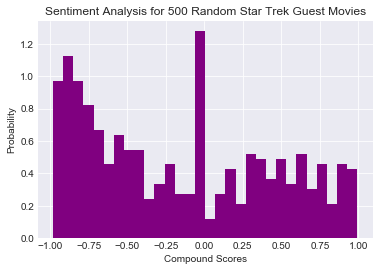

In [42]:
plt.hist(senti_data_tos['Compound'], normed=True, bins=30, color = 'purple')
plt.ylabel('Probability')
plt.title('Sentiment Analysis for 500 Random Star Trek Guest Movies')
plt.xlabel('Compound Scores')
plt.style.use('seaborn-darkgrid')
plt.savefig(f'senti_data_tos', bbox_inches="tight")
plt.show()

In [15]:
senti_data_mov.head()

,Compound,Movie Title,Negative,Neutral,Positive
1,-0.6486,대한민국 1%,0.135,0.777,0.088
2,-0.1280,Zucchero - Zu and co. - Live at the Royal Albe...,0.045,0.955,0.000
3,-0.7630,Hidden Agenda,0.204,0.665,0.131
4,0.9497,Sade Live,0.000,0.823,0.177
5,0.0000,Moonrunners,0.000,1.000,0.000


In [16]:
senti_data_mov.describe()

,Compound,Negative,Neutral,Positive
count,500.000000,500.000000,500.000000,500.00000
mean,-0.026846,0.113666,0.725972,0.09035
std,0.634027,0.119542,0.231407,0.08873
min,-0.994100,0.000000,0.000000,0.00000
25%,-0.612400,0.000000,0.682750,0.00000
50%,0.000000,0.084000,0.768500,0.07900
75%,0.560275,0.168000,0.857000,0.14225
max,0.994800,0.688000,1.000000,0.45500


In [17]:
senti_data_tos.head()

,Compound,Movie Title,Negative,Neutral,Positive
1,-0.4215,The Snows of Kilimanjaro,0.113,0.887,0.000
2,-0.5267,The Helicopter Spies,0.268,0.732,0.000
3,-0.6902,Don't You Believe It,0.110,0.890,0.000
4,-0.0387,Halls of Anger,0.114,0.800,0.086
5,0.0000,Paranormal Extremes: Text Messages from the Dead,0.000,1.000,0.000


In [18]:
senti_data_tos.head()

,Compound,Movie Title,Negative,Neutral,Positive
1,-0.4215,The Snows of Kilimanjaro,0.113,0.887,0.000
2,-0.5267,The Helicopter Spies,0.268,0.732,0.000
3,-0.6902,Don't You Believe It,0.110,0.890,0.000
4,-0.0387,Halls of Anger,0.114,0.800,0.086
5,0.0000,Paranormal Extremes: Text Messages from the Dead,0.000,1.000,0.000


In [19]:
frames = [senti_data_mov, senti_data_tos]
big_data = pd.concat(frames)

## Hypothesis Testing (P-value approach)

In [44]:
x_data = senti_data_tos['Compound']
y_data = senti_data_mov['Compound']

stats.ttest_ind(x, y, equal_var = False)

Ttest_indResult(statistic=-3.2023342905097638, pvalue=0.0014064292116908134)